<a href="https://colab.research.google.com/github/Cesarquatro/Notebooks-em-Python/blob/main/Plot_movimentos_bra%C3%A7o_rob%C3%B3tico_3DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# l1 = l2 = l3 = 40cm(Tamanho dos braços)
l1, l2, l3 = 40, 40, 40

step = 1 
print("Digite o ângulo (θ1) do Braço 1:")
theta1= float(input()) #defasegem angular do braço 1 em relação ao eixo x em graus
print("Digite o ângulo (θ2) do Braço 2:")
theta2 = float(input()) #defasegem angular do braço 2 em relação ao eixo braço 1 em graus
print("Digite o ângulo (θ3) do Braço 3:")
theta3= float(input()) #defasegem angular do braço 3 em relação ao eixo de braço 1 + braço 2 em graus

if(theta1>360):
  theta1 = theta1 % 360
if(theta1<-360):
  theta1 = theta1 % -360
if(theta2>360):
  theta2 = theta2 % 360
if(theta2<-360):
  theta2 = theta2 % -360
if(theta3>360):
  theta3 = theta3 % 360
if(theta3<-360):
  theta3 = theta3 % -360

print(f"\nθ1: {theta1}\tθ2: {theta2}\tθ3: {theta3}")

rad_1=mt.radians(theta1)
rad_2=mt.radians(theta2)
rad_3=mt.radians(theta3)


Digite o ângulo (θ1) do Braço 1:
0
Digite o ângulo (θ2) do Braço 2:
341.5
Digite o ângulo (θ3) do Braço 3:
-80

θ1: 0.0	θ2: 341.5	θ3: -80.0


In [85]:
Xtcp = l1 * mt.cos(rad_1) + l2 * mt.cos(rad_1+rad_2) + l3 * mt.cos(rad_1+rad_2+rad_3)
Ytcp = l1 * mt.sin(rad_1) + l2 * mt.sin(rad_1+rad_2) + l3 * mt.sin(rad_1+rad_2+rad_3)
orientacao = theta1 + theta2 + theta3
print(f"Xtcp:\t\t{round(Xtcp,2)}cm\nYtcp:\t\t{round(Ytcp,2)}cm\nOrientação:\t{orientacao}º")

Xtcp:		72.02cm
Ytcp:		-52.25cm
Orientação:	261.5º


In [86]:
#calculo da posição por trigonometria
x1=l1*mt.cos(rad_1)
x2=x1+l2*mt.cos(rad_1+rad_2)
x3=x2+l3*mt.cos(rad_1+rad_2+rad_3) #x=l1*math.cos(rad_1)+l2*math.cos(rad_1+rad_2)+l3*math.cos(rad_1+rad_2+rad_3)

y1=l1*mt.sin(rad_1)
y2=y1+l2*mt.sin(rad_1+rad_2)
y3=y2+l3*mt.sin(rad_1+rad_2+rad_3) #y=l1*math.sin(rad_1)+l2*math.sin(rad_1+rad_2)+l3*math.sin(rad_1+rad_2+rad_3)

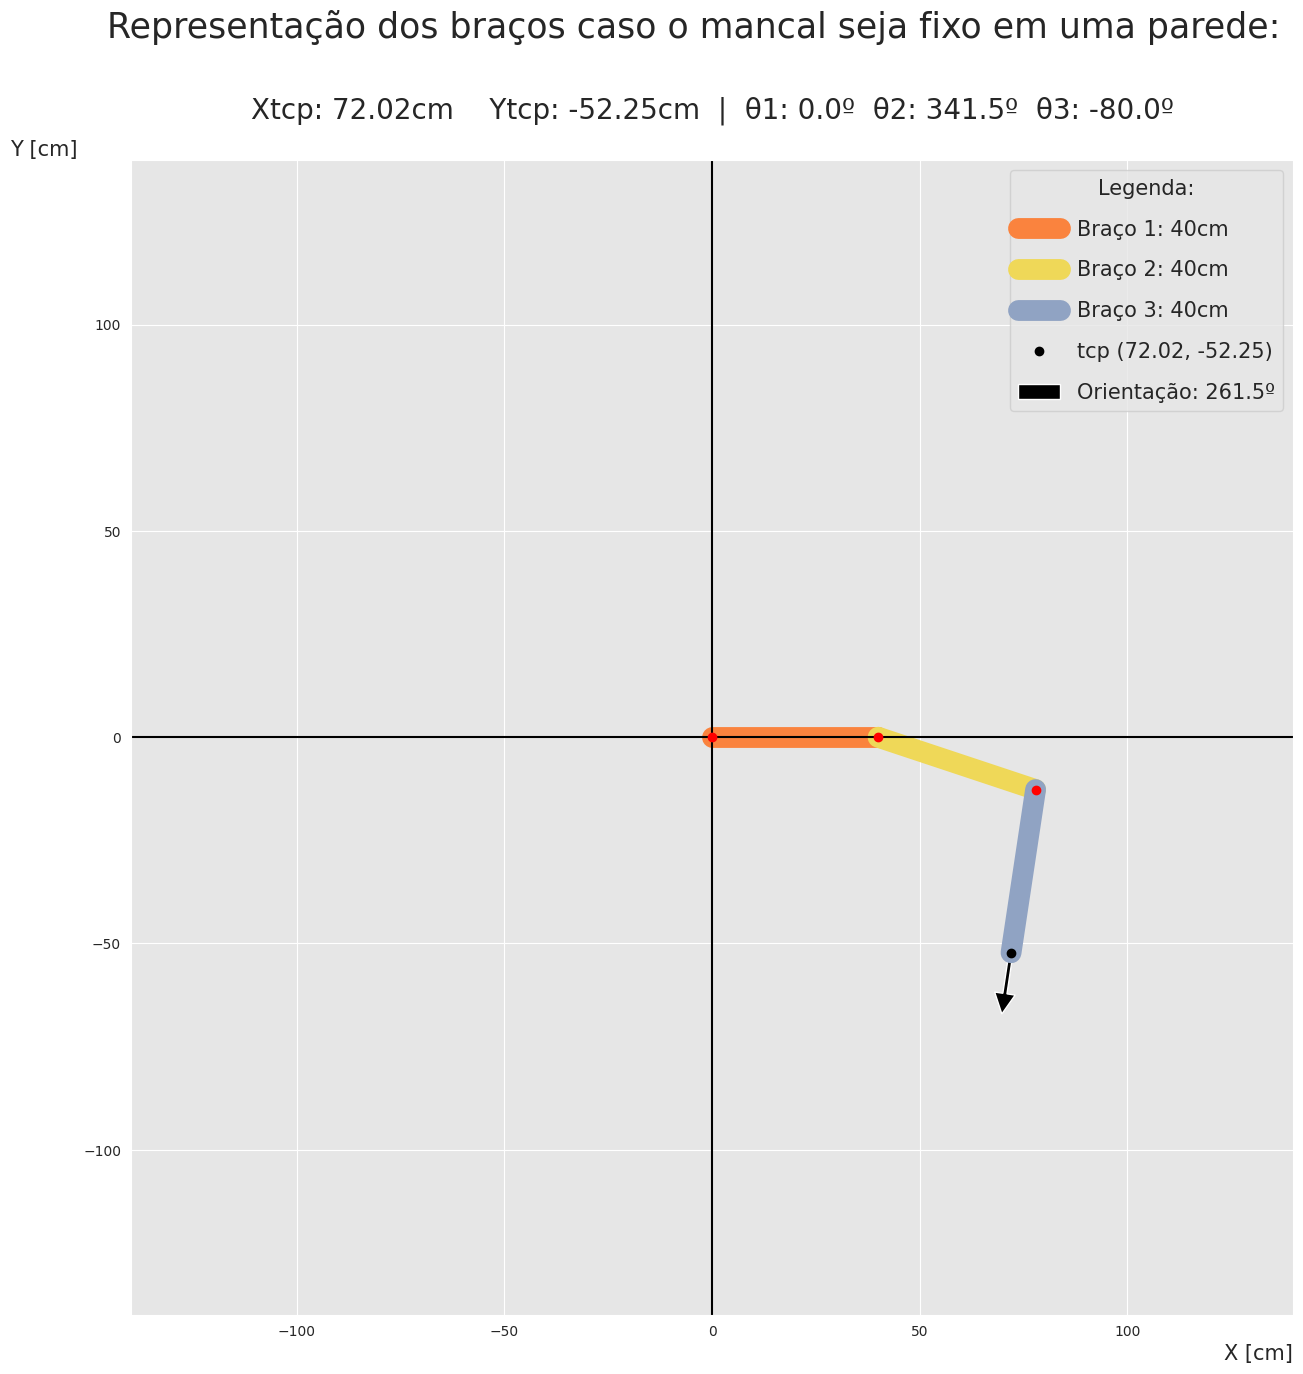

In [87]:
tamanho=10
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(15,15))
plt.grid(True)

if (x3>y3): 
  maior = x3

else:
  maior = y3

#Criação das retas
plt.plot([0,x1], [0,y1],linewidth = '15', color = "#fa833e")#reta 1
plt.plot([x1,x2], [y1,y2],linewidth = '15', color = "#efd858")#reta 2
plt.plot([x2,x3], [y2,y3],linewidth = '15', color = "#90a3c3")#reta 3

plt.plot(Xtcp,Ytcp,"ok")#primeira junta

plt.arrow(x3,
          y3,
          mt.cos(mt.radians(orientacao))*tamanho,
          mt.sin(mt.radians(orientacao))*tamanho,
          head_width=0.5*tamanho, 
          head_length=0.5*tamanho,
          width = 0.1*tamanho,
          fc = "black")

plt.xlim(-1*(l1+l2+l3+tamanho*2), l1+l2+l3+tamanho*2)
plt.ylim(-1*(l1+l2+l3+tamanho*2), l1+l2+l3+tamanho*2)

plt.hlines(y = 0, xmin = -1*(l1+l2+l3+tamanho*2), xmax = l1+l2+l3+tamanho*2, colors='black')
plt.vlines(x = 0, ymin = -1*(l1+l2+l3+tamanho*2), ymax = l1+l2+l3+tamanho*2, colors='black')

plt.plot(0,0,"or")#primeira junta
plt.plot(x1,y1,"or")#segunda junda
plt.plot(x2,y2,"or")#terceira junta
#plt.plot(x3,y3,"or")#ponto onde se localiza a ferramenta/ponto de refencia do macanismo

plt.suptitle("Representação dos braços caso o mancal seja fixo em uma parede:", fontsize = 25)
plt.title(f"Xtcp: {round(Xtcp,2)}cm    Ytcp: {round(Ytcp,2)}cm  |  θ1: {theta1}º  θ2: {theta2}º  θ3: {theta3}º\n", fontsize = 20)
plt.xlabel("X [cm]", fontsize = 15, loc = 'right')
plt.ylabel("Y [cm]", fontsize = 15, loc = 'top', rotation = 0)

legenda = plt.legend([f"Braço 1: {round(l1,2)}cm",
                     f"Braço 2: {round(l2,2)}cm",
                     f"Braço 3: {round(l3,2)}cm",
                     f"tcp ({round(Xtcp,2)}, {round(Ytcp,2)})",
                     f"Orientação: {orientacao}º"],
                    loc ="best", fontsize = 15,
                    labelspacing=1,
                    title = "Legenda:",
                    frameon=True)
legenda.get_title().set_fontsize('15')
plt.show()